In [1]:
from matplotlib import pyplot
import numpy
import os

In [2]:
basedir = '../outputs/villain/'
L = 32

all_ks = []
all_actions = []

mean_points = []

for x in os.listdir(basedir):
    if x.endswith('.npz'):
        arr = numpy.load(os.path.join(basedir, x))
        
        x = arr['energies']
        ks = arr['ks']

        for (k, xx) in zip(ks, x.T):
            xxx = xx - xx.mean()
            
            binder = 1.0 - (xxx**4).mean() / (3 * ((xxx**2).mean()**2))
            mean_points.append((k, xx.mean() / (32**4), xx.var() / (32**4), binder))
            all_ks.extend([k]*len(xx))
            all_actions.extend(xx / (32**4))

unique_ks, mean_actions, std_actions, binder_actions = zip(*sorted(mean_points, key=lambda x: x[0]))

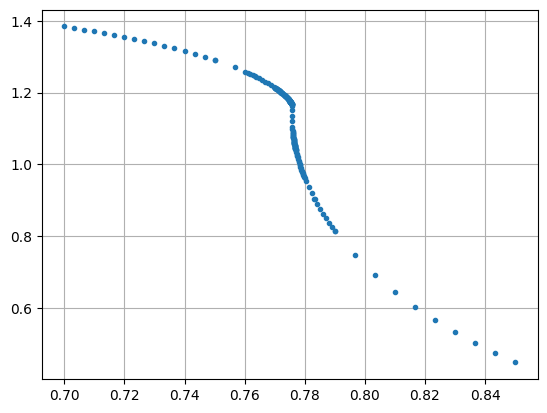

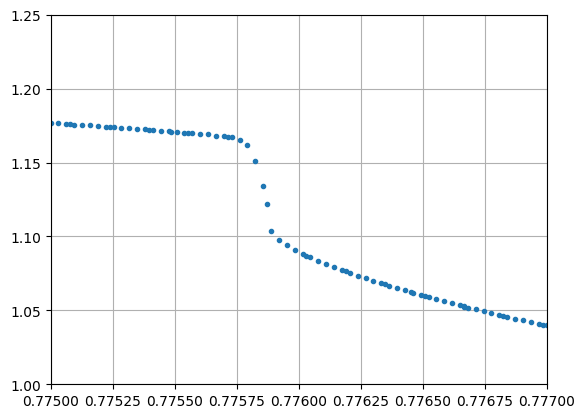

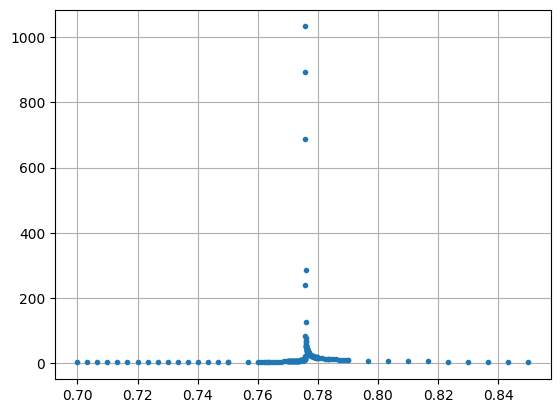

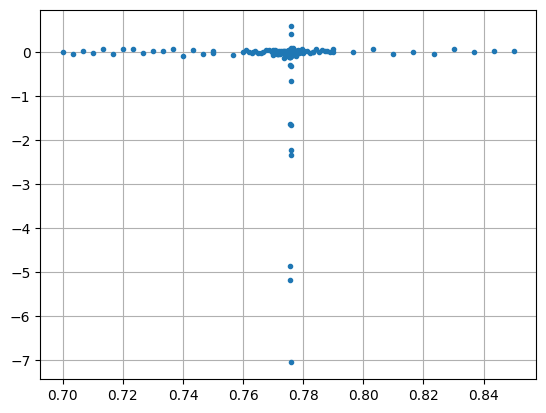

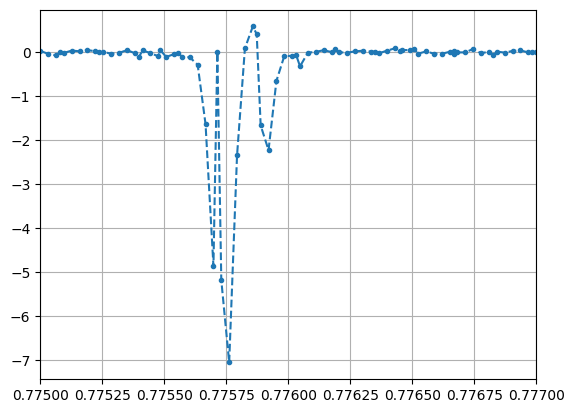

In [3]:
pyplot.plot(unique_ks, mean_actions, '.')
pyplot.grid()
pyplot.show()

pyplot.plot(unique_ks, mean_actions, '.')
pyplot.xlim((0.775, 0.777))
pyplot.ylim((1.0, 1.25))
pyplot.grid()
pyplot.show()

pyplot.plot(unique_ks, std_actions, '.')
pyplot.grid()
pyplot.show()

pyplot.plot(unique_ks, binder_actions, '.')
pyplot.grid()
pyplot.show()

pyplot.plot(unique_ks, binder_actions, '.--')
pyplot.xlim((0.775,0.777))
pyplot.grid()
pyplot.show()

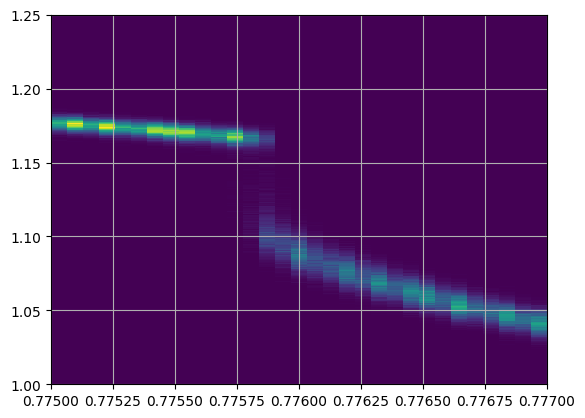

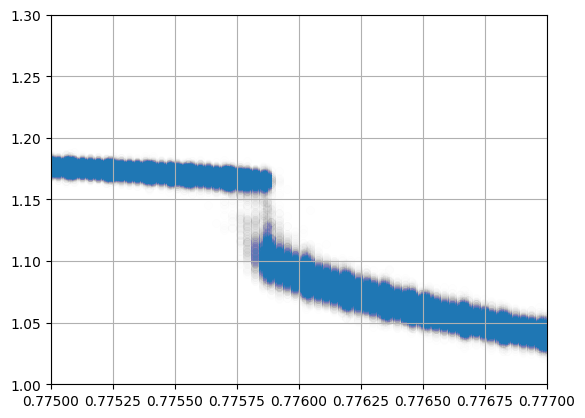

In [4]:
pyplot.hist2d(all_ks, all_actions, bins=[numpy.linspace(0.775, 0.777, 32), numpy.linspace(1.0,1.25, 512)])
pyplot.grid()
pyplot.show()

pyplot.scatter(all_ks, all_actions, alpha=0.002)
pyplot.xlim((0.775,0.777))
pyplot.ylim((1.0,1.3))
pyplot.grid()
pyplot.show()

In [5]:
ndigits = 128
ks_digits = numpy.digitize(all_ks, numpy.linspace(0.775, 0.777, ndigits))

kd_bins = {}

for kd, action in zip(ks_digits, all_actions):
    if kd == 0 or kd == ndigits:
        continue
    if kd not in kd_bins:
        kd_bins[kd] = []
    kd_bins[kd].append(action)

arr = []

for kd in sorted(kd_bins.keys()):
    actions = kd_bins[kd]
    hist_actions, _ = numpy.histogram(actions, bins=numpy.linspace(1.0,1.25,256), density=True)
    hist_actions = hist_actions / sum(hist_actions)
    arr.append(hist_actions)
arr = numpy.array(arr)

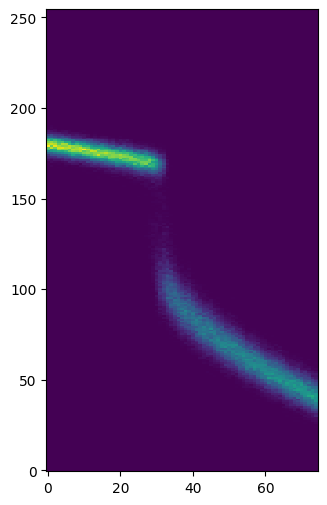

/tmp/ipykernel_78422/1431148347.py:8: RuntimeWarning: divide by zero encountered in log
  ax.imshow(numpy.log(arr.T), interpolation='none') #, extent=[0.775,0.777, 1.0,1.25])


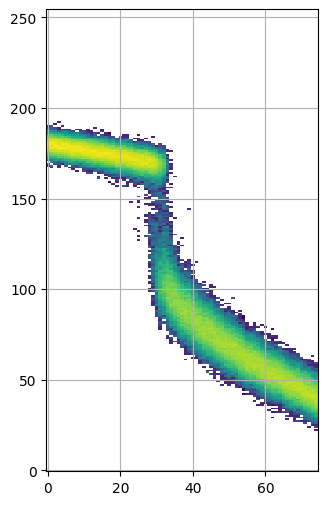

In [6]:
fig, ax = pyplot.subplots(figsize=(6,6))
ax.imshow(arr.T, interpolation='none') #, extent=[0.775,0.777, 1.0,1.25])
ax.set_aspect(0.5)
ax.invert_yaxis()
pyplot.show()

fig, ax = pyplot.subplots(figsize=(6,6))
ax.imshow(numpy.log(arr.T), interpolation='none') #, extent=[0.775,0.777, 1.0,1.25])
ax.set_aspect(0.5)
ax.invert_yaxis()
ax.grid()
pyplot.show()